<a href="https://colab.research.google.com/github/linhoangce/pytorch_crash_course/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

## 0. Computer Vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transforms` - functions for manipulating vision data (images) to be suitable for use
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - creates a Pytorch iterable over a dataset

In [127]:
import torch
from torch import nn

import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


## 1. Getting a dataset



In [128]:
# Set up training data
train_data = datasets.FashionMNIST(
    root="data", # root dir for data
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [129]:
len(train_data), len(test_data)

(60000, 10000)

In [130]:
# see the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [131]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [132]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [133]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [134]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [135]:
train_data[9]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6431, 0.1961,
           0.0000, 0.0275, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0039, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0039, 0.0039,
           0.0000, 0.0000, 0.0196, 0.0000, 

In [136]:
class_names[label]

'Ankle boot'

### Visualize data

In [137]:
import matplotlib.pyplot as plt

In [138]:
image, label = train_data[0]

In [139]:
print(f"image shape: {image.shape}")

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

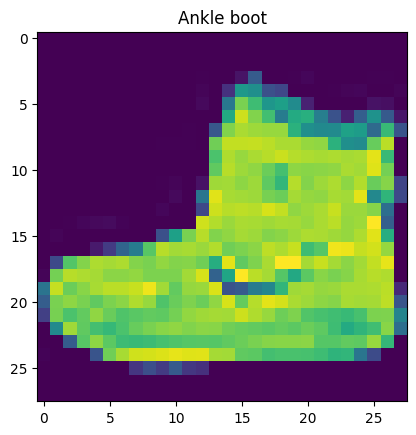

In [140]:
plt.imshow(image.squeeze())
plt.title(class_names[label])

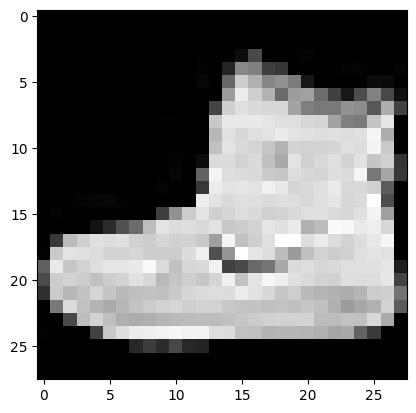

In [141]:
plt.imshow(image.squeeze(), cmap="gray")

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

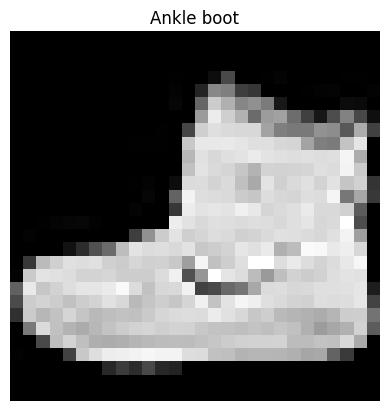

In [142]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

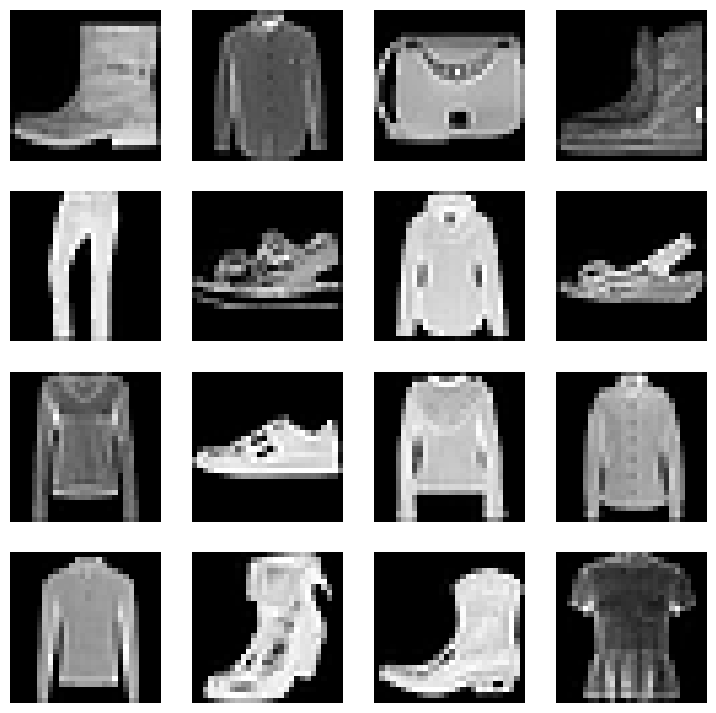

In [143]:
# plot random images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  # print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.axis(False)

## 2. Prepare DataLoader

In [144]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (mini-batches).

Why?

1. It is more computationally efficient because our computing hardware may not be able to look (store in memory) at 60000 images in one hit.
2. It gives our neural network more chances to update its gradient per epoch.

In [145]:
from torch.utils.data import DataLoader

# set up the batch size hyperparameter
BATCH_SIZE = 32

# turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)


In [146]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78927fe96790>,
 <torch.utils.data.dataloader.DataLoader at 0x789280994f10>)

In [147]:
train_dataloader.batch_size, test_dataloader.batch_size

(32, 32)

In [148]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [149]:
# check what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(torch.Size([1, 28, 28]), torch.Size([]))

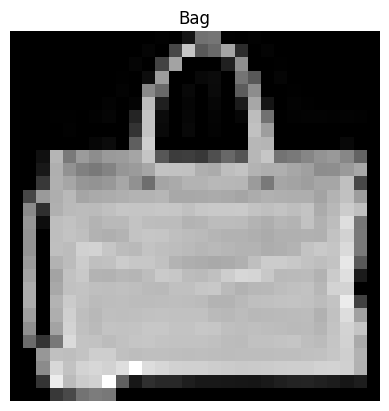

In [150]:
# show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
img.shape, label.shape

## 3. Model 0: Build a baseline model

In [151]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x) # perform forward pass

print(f"shape before flattening: {x.shape}")
print(f'shape after flattening: {output.shape}')


shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [152]:
from torch import nn

In [153]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [154]:
torch.manual_seed(42)

# set up model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784,
                              output_shape=len(class_names),
                              hidden_units=10).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [155]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Loss function and optimizer

In [156]:
import requests
from pathlib import Path

In [157]:
# download helper function
if Path("helper_functions.py").is_file():
  print("file exists")
else:
  print("downloading helper_functions.py...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

file exists


In [158]:
from helper_functions import accuracy_fn

In [159]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [160]:
from timeit import default_timer as timer

In [161]:
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """prints difference between start and end time"""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [162]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


5.584700011240784e-05

### Train loop and training on batches

In [163]:
# import tqdm for progress bar
from tqdm.auto import tqdm

In [164]:
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------------")

  # training
  train_loss = 0

  # loop through batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # forward pass
    y_pred = model_0(X)

    # calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    # calculate average loss per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # print metrics per epoch
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

train_time_end_on_cpu = timer()
total_train_time_on_cpu = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.9096 | Test loss: 0.6290 | Test acc: 78.6342
Epoch: 1
-------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5573 | Test loss: 0.5441 | Test acc: 81.1302
Epoch: 2
-------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5027 | Test loss: 0.5137 | Test acc: 81.9988
Train time on cpu: 48.836 seconds


## 4. Make predictions and get Model 0 results

In [165]:
torch.manual_seed(42)

def eval_model(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate loss and accuracy per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [166]:
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5136751532554626,
 'model_acc': 81.9988019169329}

## 5. Setup device agnostic code (GPU)


In [167]:
device = "gpu" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [168]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [169]:
# create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape,
               output_shape,
               hidden_units):
    super().__init__()
    self.stack_layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU(),
    )

  def forward(self, x):
    return self.stack_layers(x)

In [170]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              output_shape=len(class_names),
                              hidden_units=10).to(device)
model_1

FashionMNISTModelV1(
  (stack_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [171]:
next(model_1.parameters()).device

device(type='cpu')

### Loss function, optimizer and evaluation metrics

In [172]:
from helper_functions import accuracy_fn

In [173]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### Functionizing training and evaluation loops

In [174]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # put model into training mode
  model.train()

  # Loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # put data to target device
    X, y = X.to(device), y.to(device)

    # forward pass
    y_pred = model(X)

    # calculate loss and accuracy per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")

In [175]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop on model going over data_loader."""
  test_loss, test_acc = 0, 0

  # put model in eval mode
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # calculate average loss and acc
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.4f} | test acc: {test_acc:.2f}%\n")

In [176]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                           end=train_time_end_on_gpu,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 1.0920 | Train acc: 61.34%
Test loss: 0.9564 | test acc: 65.00%

Train loss: 0.7810 | Train acc: 71.93%
Test loss: 0.7223 | test acc: 73.91%

Train loss: 0.6703 | Train acc: 75.94%
Test loss: 0.6850 | test acc: 75.02%

Train time on cpu: 69.014 seconds


In [177]:
next(model_1.parameters()).device

device(type='cpu')

In [178]:
# try larger batches since train time is too slow
train_dataloader = DataLoader(train_data,
                              batch_size=128,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=128,
                             shuffle=False)


In [179]:
start = timer()

for epoch in tqdm(range(epochs)):
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

end = timer()
print_train_time(start=start,
                 end=end,
                 device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.6099 | Train acc: 77.75%
Test loss: 0.6389 | test acc: 76.76%

Train loss: 0.6029 | Train acc: 78.00%
Test loss: 0.6437 | test acc: 76.33%

Train loss: 0.5968 | Train acc: 78.22%
Test loss: 0.6513 | test acc: 76.34%

Train time on cpu: 47.774 seconds


47.77376691900008

In [180]:
total_train_time_on_cpu

48.83601144900058

In [181]:
total_train_time_model_1

69.01358686200001

In [182]:
# get model_1 results
model_1_results = eval_model(model=model_1.to("cpu"),
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/79 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6513033509254456,
 'model_acc': 76.33504746835443}

In [183]:
# adjust the eval_model() to be device agnostic
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device):
  test_loss, test_acc = 0, 0

  # put model to target device
  model.to(device)

  # put model in eval mode
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      # put data to target device
      X, y = X.to(device), y.to(device)

      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": test_loss.item(),
            "model_acc": test_acc}

In [184]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6513033509254456,
 'model_acc': 76.33504746835443}

In [185]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5136751532554626,
 'model_acc': 81.9988019169329}

## Model 2: Convolutional Neural Network

CNNs are also called ConvNets

In [186]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG model from CNN explainer website.
  """

  def __init__(self,
               input_shape: int,
               output_shape: int,
               hidden_units: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 7 * 7, # there's a trick to calculate this
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1 {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2 {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier {x.shape}")
    return x

In [187]:
image.shape

torch.Size([1, 28, 28])

In [188]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

### 7.1 Stepping through `nn.Conv2d`

In [189]:
torch.manual_seed(42)

# create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"single image shape: {test_image.shape}")
print(f"Test image:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [190]:
torch.manual_seed(42)
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# pass data through convolutional layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [191]:
conv_output.shape

torch.Size([10, 62, 62])

In [192]:
rand_image_tensor = torch.rand(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [193]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0317, -0.0713,  0.0596, -0.0422, -0.0069,  0.0246,  0.0037, -0.0151,
          0.0235,  0.0004]], grad_fn=<AddmmBackward0>)

In [194]:
10*7*7

490

### 7.3 Setup a loss function and optimizer

In [195]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Train and test CNN model

In [196]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as timer

start_time = timer()

# train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----------------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

end_time = timer()
total_train_time_model_2 = print_train_time(start=start_time,
                                            end=end_time,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------------
Train loss: 0.9277 | Train acc: 66.59%
Test loss: 0.5025 | test acc: 82.15%

Epoch: 1
-----------------
Train loss: 0.4449 | Train acc: 83.77%
Test loss: 0.4097 | test acc: 84.92%

Epoch: 2
-----------------
Train loss: 0.3797 | Train acc: 86.19%
Test loss: 0.3651 | test acc: 86.96%

Train time on cpu: 199.177 seconds


In [197]:
# get result
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.36512988805770874,
 'model_acc': 86.9560917721519}

## 8. Comparing model results and training time

In [198]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.513675,81.998802
1,FashionMNISTModelV1,0.651303,76.335047
2,FashionMNISTModelV2,0.365130,86.956092


In [199]:
# add training time to results comparison
compare_results["train_time"] = [total_train_time_on_cpu,
                                 total_train_time_model_1,
                                 total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,train_time
0,FashionMNISTModelV0,0.513675,81.998802,48.836011
1,FashionMNISTModelV1,0.651303,76.335047,69.013587
2,FashionMNISTModelV2,0.365130,86.956092,199.176866


Text(0, 0.5, 'model')

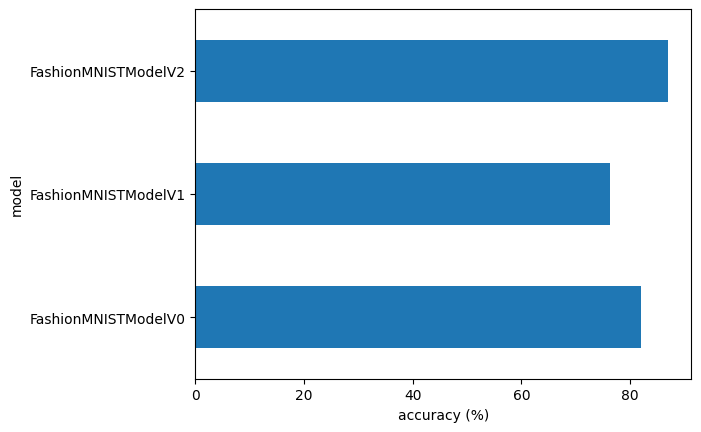

In [200]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with the best model (up to now)

In [201]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass
      pred_logit = model(sample)

      # get prediction probabilities (logits -> pred probs)
      pred_prob = torch.softmax(pred_logit.squeeze(),
                                dim=0)

      # get pred_prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [202]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [203]:
import random

# random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

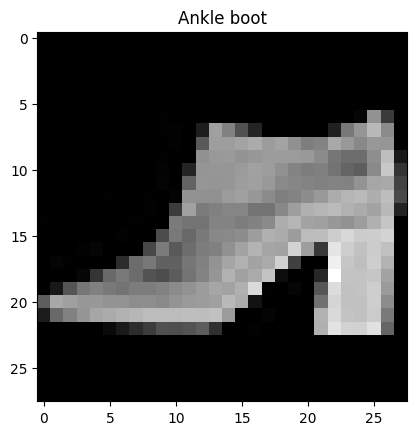

In [204]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [205]:
# make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              device=device)

# view first two prediction probabilities
pred_probs[:2]

tensor([[1.9494e-05, 8.1650e-07, 7.6468e-06, 2.7493e-06, 5.6115e-07, 2.8658e-02,
         5.4347e-06, 2.2607e-03, 1.9599e-03, 9.6709e-01],
        [2.2181e-05, 3.0794e-05, 6.0336e-03, 2.7061e-06, 9.8833e-01, 4.8688e-07,
         5.5354e-03, 1.7496e-06, 4.4533e-05, 2.2357e-06]])

In [206]:
# convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 4, 6, 9, 7, 0, 4, 0, 5])

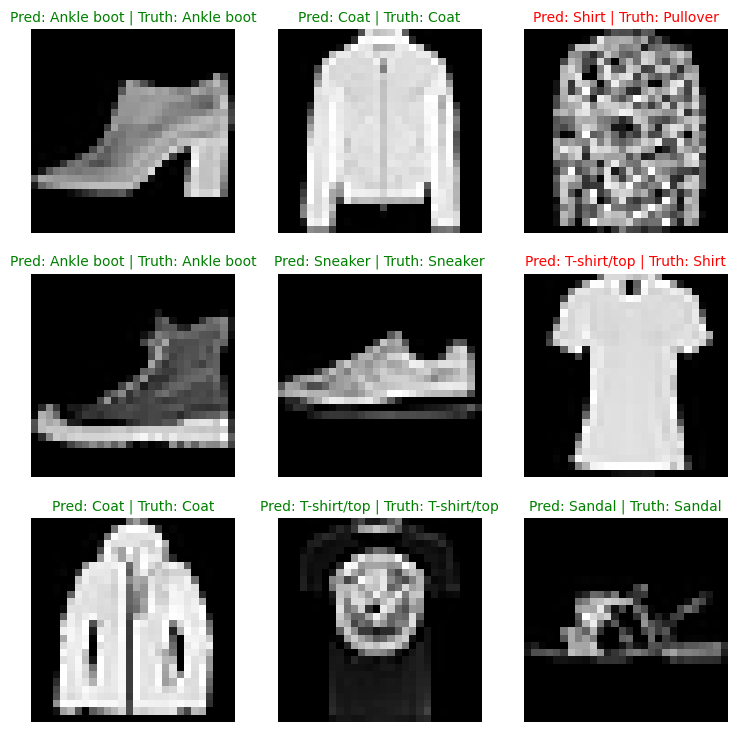

In [207]:
# plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # create a subplot
  plt.subplot(nrows, ncols, i+1)

  # plot target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # find prediction labels (in text form)
  pred_label = class_names[pred_classes[i]]

  # get the truth label
  truth_label = class_names[test_labels[i]]

  # create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if predictions same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

## 10. Make a confusion matric for further evaluation of model

1. Make predictions with trained model on test dataset
2. Make a confusion matrix with `torchmetrics.ConfusionMatrix`
3. Plot confusion matrix with `mlxtend.plotting.plot_confusion_matrix()`

In [208]:
from tqdm.auto import tqdm

In [209]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader,
                   desc="Making predictions...."):
    # send data to target device
    X, y = X.to(device), y.to(device)
    # forward pass
    y_logit = model_2(X)

    # turn predictions from logits -> pred probs => labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    # put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

# concatenate list of predictions into a tensor
# print(y_preds[:10])
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions....:   0%|          | 0/79 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 2])

In [210]:
len(y_pred_tensor)

10000

In [211]:
# check if required packages are installed, otherwise install them
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


In [212]:
import mlxtend
mlxtend.__version__

'0.23.4'

In [214]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [215]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

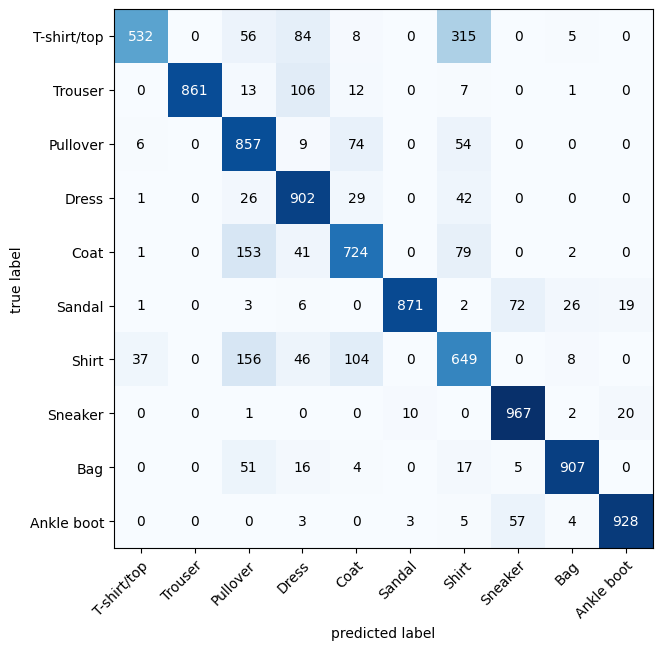

In [220]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2.setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),
                          task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. plot confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # platplotlib works with numpy
    class_names=class_names,
    figsize=(10, 7)
)

## 11. Save and load model

In [221]:
from pathlib import Path

# create model dir path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# Create model save
MODEL_NAME = 'pytorch_conv_model_cv.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# sve the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models/pytorch_conv_model_cv.pth


In [222]:
# create a new instance of saved model
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# load in model state_dict
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

# send model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [223]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.36512988805770874,
 'model_acc': 86.9560917721519}

In [225]:
# evaluate loaded model
loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.36512988805770874,
 'model_acc': 86.9560917721519}

In [227]:
# check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-8 # adjust tolerence range
              )

tensor(True)